# Machine Learning Coursera 

Exercise 2 : Logistic regression

In this exercise we will predict whether a student get admission or not on the basis of his marks in the exams.We have historical dataset of marks of applicants in exam1 and exam2 and their result (1 if applicant selected 0 if rejected).Basically an applicant is either is selected or rejected so we need a classification model to estimate probability.

## Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

So basically we need to import these libraries for the various purpose such as plotting the graph, calculation of Gradient Descent and similar things.Pandas and Numpy are the very Rich libraries they provide very high level Data manipulation optimally.They are very convenient to use as building your code for such complex operations is surely not a good idea.

In [2]:
import os
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Now we will plot the the data for better visualisation.Let's see how it look like.

## ===================== Plotting ======================

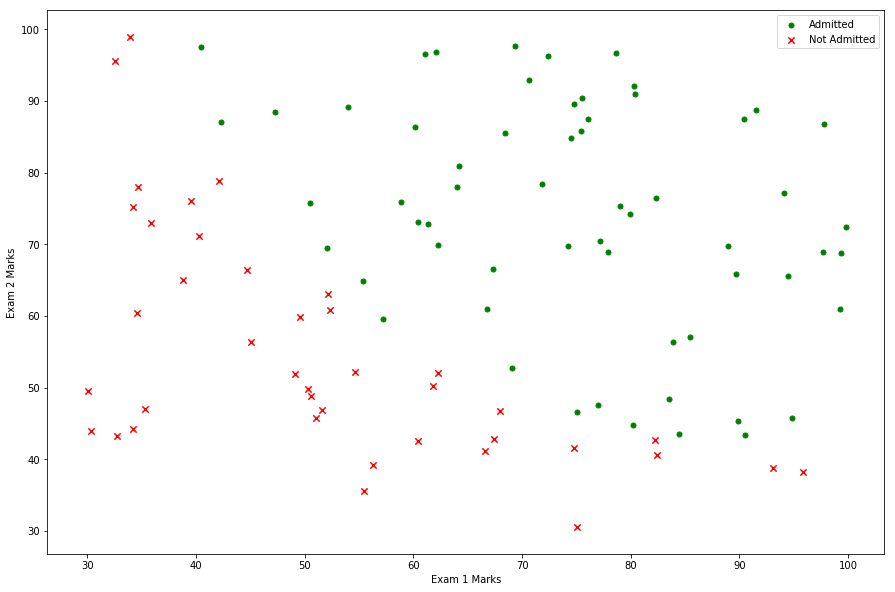

In [3]:
admitted = data[data['Admitted'].isin([1])]
not_admitted = data[data['Admitted'].isin([0])]

fig, axes = plt.subplots(figsize=(15,10))

axes.scatter(admitted['Exam 1'], admitted['Exam 2'], s=25, c='g', marker='o', label='Admitted')
axes.scatter(not_admitted['Exam 1'], not_admitted['Exam 2'], s=40, c='r', marker='x', label='Not Admitted')

axes.legend()                    ## Used to Display Labels
axes.set_xlabel('Exam 1 Marks')
axes.set_ylabel('Exam 2 Marks')

It looks like here we need to classify or to plot the decision boundry between the two classes.For this we need to define logistic function i.e, y = 1 / 1 + e^-x

In [4]:
def sigmoid(z):                        ## defining sigmoid i.e, y = 1 /( 1 + e^(-ax + b))
    return (1 /( 1 + np.exp(-z)))

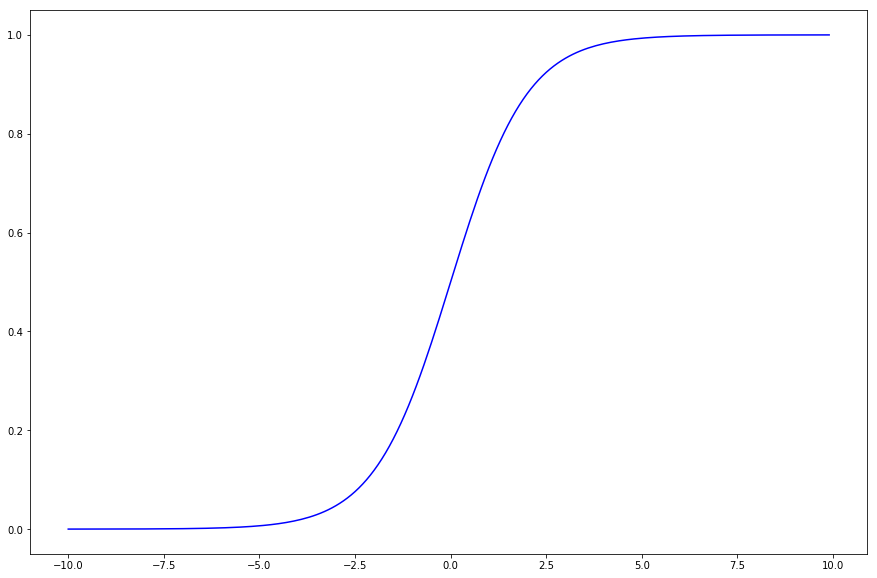

In [5]:
nums = np.arange(-10, 10, step=0.1)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(nums, sigmoid(nums), 'b')

This is the curve of sigmoid function now we will define cost function

## ======================= Cost Function ======================

As we know,
        
            Cost( h(x), y) = { -log( h(x)); if y = 1
                               -log(1 - h(x)); if y = 0 }
                               
instead of defining both function we can rewrite it as,

            Cost( h(x), y) = { - y*log( h(x)) - (1 - y)*log(1 - h(x))  
            
as we know sigmoid function y = 1 /( 1 + e^(-ax + b)), so here we consider b = 0 for simplicity and our job is to compute a,in other words we have to compute theta and minimize the cost.

In [6]:
def cost(theta, X, y):                         ## defining the cost function (error function) to compute cost
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    y1 = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    
    y2 = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T))) 
    return np.sum(y1 - y2) / (len(X))       

In [7]:
data.insert(0, 'Ones', 1)                   ## added ones for biasing.
data.head(n=5)

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [8]:
cols = data.shape[1]             ## assigns no of columns. i.e, shape[] = {no_of_columns, no of rows)
X = data.iloc[:,0:cols-1]        ## assigns all rows and column-1
y = data.iloc[:,cols-1:cols]     ## assigns all rows and last column
X.head()                         ## Shows first 5 set of data stored in X of object type

,Ones,Exam 1,Exam 2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [9]:
y.head()

,Admitted
0,0
1,0
2,0
3,1
4,1


In [10]:
X = np.array(X.values)             ## Converting to arrays for computation
y = np.array(y.values)             
theta = np.zeros(3)                ## Initializing theta to zero.

Now our next job is to compute the initial cost.

In [11]:
cost(theta, X, y)

0.69314718055994529

This is very high cost and now we have to minimise it using gradient descent algorithm.

## ======================= Gradient Descent =======================

In [12]:
def gradientDescent(theta, X, y):                   ## Defining gradient descent
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])  
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [13]:
gradientDescent(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

we got the array or theta and we haven't performed gradient descent here, we have only computed the single gradient step.So now we will use SciPy's truncated newton implementation to find optimal parameters. 

In [14]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradientDescent, args=(X, y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [15]:
cost(result[0], X, y)

0.20349770158947458

This is our minimum cost, now we will make prediction on the given Marks

In [17]:
flag = True
while flag :
    marks1 = int(input("Program paused. Enter the marks in exam1:"))
    marks2 = int(input("Program paused. Enter the marks in exam2:"))
    if marks1 >= 0 & marks2 >= 0 :
        flag = False
        probability = sigmoid(np.dot(np.array([1,marks1,marks2]),result[0]))
        print('For a student with scores {} and {}, we predict an admission probability of {:f}'.format(marks1,marks2,probability))
    else :
            print("Marks can't be -ve!! Please Try again")

Program paused. Enter the marks in exam1:65
Program paused. Enter the marks in exam2:85
For a student with scores 65 and 85, we predict an admission probability of 0.995362
